In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

table = pd.read_csv("FyntraCustomerData.csv")
#print(table.isnull().sum())

correlation:                       Time_on_Website  Yearly_Amount_Spent
Time_on_Website             1.000000            -0.002641
Yearly_Amount_Spent        -0.002641             1.000000


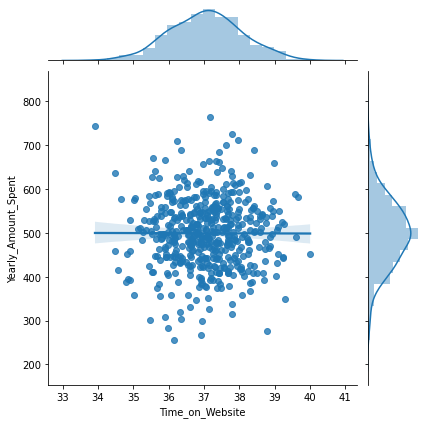

In [2]:
'''
1.Compute --Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount 
Spent columns.  Is there a correlation?
'''
sn.jointplot(table["Time_on_Website"],table["Yearly_Amount_Spent"],data=table,kind="reg")
table1 = table.loc[:,["Time_on_Website","Yearly_Amount_Spent"]]
print("correlation: ",table1.corr())

correlation:                       Time_on_App  Yearly_Amount_Spent
Time_on_App             1.000000             0.499328
Yearly_Amount_Spent     0.499328             1.000000


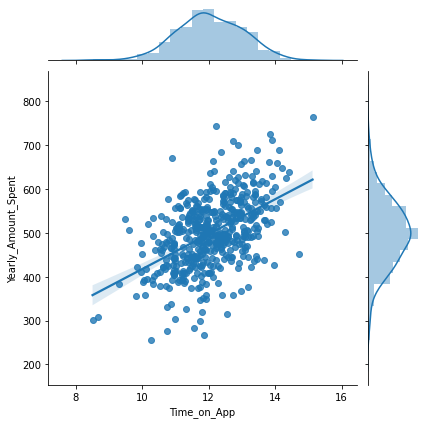

In [3]:
'''
2.Compute –Do the same as above but now with Time on App and Yearly Amount Spent. 
Is this correlation stronger than 1stOne?
'''

sn.jointplot(table["Time_on_App"],table["Yearly_Amount_Spent"],data=table,kind="reg")
table2 = table.loc[:,["Time_on_App","Yearly_Amount_Spent"]]
print("correlation: ",table2.corr())

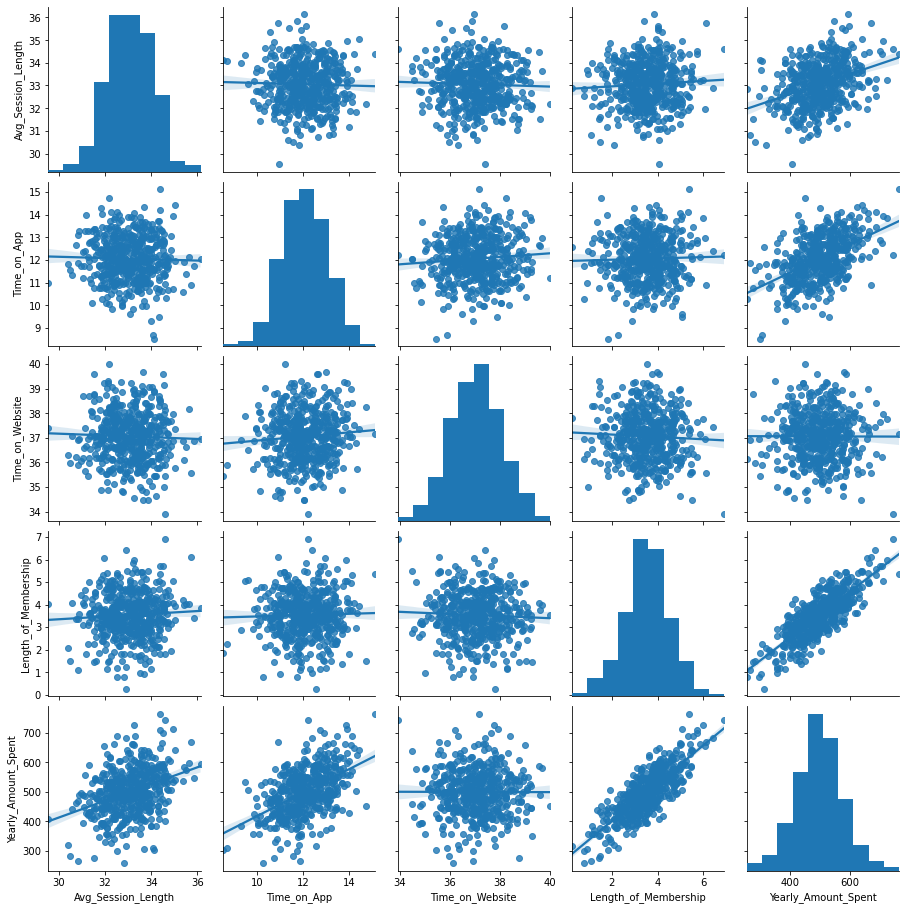

In [4]:
'''
3.Compute --Explore types of relationships across the entire data set using pairplot . 
Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?
'''
sn.pairplot(table,kind="reg")

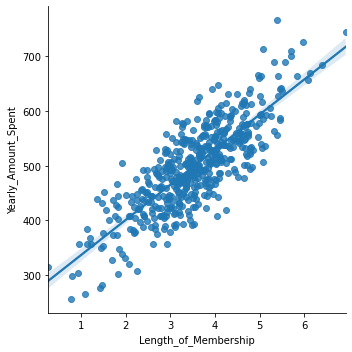

In [5]:
'''
4.Compute –Create linear model plot of Length of Membership and Yearly Amount Spent. 
Does the data fits well in linear plot?
'''

sn.lmplot(x="Length_of_Membership",y="Yearly_Amount_Spent",data=table)

Coefficients: 
 [26.09716528 39.17267758  0.63543838 61.3815602 ]
Mean squared error: 111.94
Coefficient of determination: 0.98


'\n8.Final Question –Based on coefficients interpret company should focus more on their \nmobile app or on their website\n'

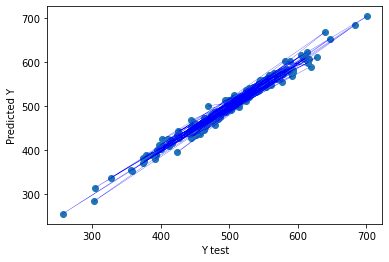

In [6]:
'''
5.Compute –Train and Test the data and answer multiple questions --What is the use of 
random_state=85?
'''
# by setting random state to any integer value it picks the data in the sequence 
#of provided number here for example random_state = 85 next would be,170,255,... hence this 
#will ensure everytime we run the model we get the same result as random_state is set if it 
#is set to none then we will get different results everytime

'''
6.Compute –Predict the data and do a scatter plot. Check if actual and predicted data match?
'''
x = table.iloc[:,[3,4,5,6]]
y = table["Yearly_Amount_Spent"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =  0.33, random_state = 85)
lm = LinearRegression()
model = lm.fit(x_train,y_train)

pred_y = lm.predict(x_test)
plt.scatter(y_test,pred_y)
plt.plot(y_test,pred_y,color="blue",linewidth=0.25)
plt.xlabel("Y test")
plt.ylabel("Predicted Y")

# The coefficients
print('Coefficients: \n', lm.coef_)

'''
7.What is the value of Root Mean Squared Error?
'''

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, pred_y))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, pred_y))

'''
8.Final Question –Based on coefficients interpret company should focus more on their 
mobile app or on their website
'''

###Mobile App as per their yerly spendings there is exponential growth in time_mobile_app
###while website has been the same(no growth over time) even though yearly spending were high